<a href="https://colab.research.google.com/github/heokwon/OCR_Vehicle-registration-plate/blob/main/Car_License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xmltodict split-folders easyocr GPUtil
# !pip install split-folders
# !pip install easyocr
# !pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 2.9 MB 5.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 619 kB 79.0 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 145 kB 95.0 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 47.6 MB 283 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=72f999da9379e9107f65a4f151528ca2dfdaeb5e8b74eb2b917c8106b54bb941
  Stored in directory: /root/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built GPUtil
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling ope

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14245, done.
remote: Total 14245 (delta 0), reused 0 (delta 0), pack-reused 14245
Receiving objects: 100% (14245/14245), 13.50 MiB | 27.11 MiB/s, done.
Resolving deltas: 100% (9810/9810), done.


In [3]:
!pip install -qr /content/yolov5/requirements.txt

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 182 kB 4.9 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 62 kB 1.5 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.6 MB 45.5 MB/s 


In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import cv2
import uuid
import time
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import xmltodict
import glob
import xml.etree.ElementTree as ET
import random as rnd
import splitfolders
import easyocr
import PIL
import copy

from pathlib import Path
from sklearn.model_selection import train_test_split
from collections import Counter
from PIL import Image
from tqdm.auto import tqdm
from GPUtil import showUtilization as gpu_usage
from numba import cuda
from timeit import default_timer as timer

import torch

import matplotlib
# matplotlib.use('TkAgg')

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib import patches as mpatches

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/OCR/Data/kaggle_data.zip /content
!unzip /content/kaggle_data.zip

# 1. Train YOLOv5 to detect car plates

## Prepare the data
### We will use it to describe the pictures and their annotations. First let's define dictionary with the basic informations about the dataset.

In [7]:
dataset = {
            "file":[],
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],
            "xmax":[],
            "ymax":[]
           }

### Let's explore data a bit. As you can see each image has corresponding file in .xml format that describes it.

In [8]:
img_names = sorted(os.listdir('/content/images'))
annotations = sorted(os.listdir('/content/annotations'))
img_names[:10]

['Cars0.png',
 'Cars1.png',
 'Cars10.png',
 'Cars100.png',
 'Cars101.png',
 'Cars102.png',
 'Cars103.png',
 'Cars104.png',
 'Cars105.png',
 'Cars106.png']

In [9]:
annotations[:10]

['Cars0.xml',
 'Cars1.xml',
 'Cars10.xml',
 'Cars100.xml',
 'Cars101.xml',
 'Cars102.xml',
 'Cars103.xml',
 'Cars104.xml',
 'Cars105.xml',
 'Cars106.xml']

In [ ]:
# img_names=[] 
# annotations=[]
# for dirname, _, filenames in os.walk("kaggle/CV/Plate_recognition/"):
#     for filename in filenames:
#         if os.path.join(dirname, filename)[-3:]==("png" or "jpg"):
#             img_names.append(filename)
#         elif os.path.join(dirname, filename)[-3:]=="xml":
#             annotations.append(filename)
    
# img_names[:10]

['Cars0.png',
 'Cars1.png',
 'Cars10.png',
 'Cars100.png',
 'Cars101.png',
 'Cars102.png',
 'Cars103.png',
 'Cars104.png',
 'Cars105.png',
 'Cars106.png']

In [ ]:
# annotations[:10]

['Cars0.xml',
 'Cars1.xml',
 'Cars10.xml',
 'Cars100.xml',
 'Cars101.xml',
 'Cars102.xml',
 'Cars103.xml',
 'Cars104.xml',
 'Cars105.xml',
 'Cars106.xml']

### Now we can rewrite the info from .xml to our dictionary. Notice that for each photo we can get multiple bonding boxes, therefore filenames, width and height will recur.

In [10]:
path_annotations="/content/annotations/*.xml" 

for item in glob.glob(path_annotations):
    tree = ET.parse(item)
    
    for elem in tree.iter():
        if 'filename' in elem.tag:
            filename=elem.text
        elif 'width' in elem.tag:
            width=int(elem.text)
        elif 'height' in elem.tag:
            height=int(elem.text)
        elif 'xmin' in elem.tag:
            xmin=int(elem.text)
        elif 'ymin' in elem.tag:
            ymin=int(elem.text)
        elif 'xmax' in elem.tag:
            xmax=int(elem.text)
        elif 'ymax' in elem.tag:
            ymax=int(elem.text)
            
            dataset['file'].append(filename)
            dataset['width'].append(width)
            dataset['height'].append(height)
            dataset['xmin'].append(xmin)
            dataset['ymin'].append(ymin)
            dataset['xmax'].append(xmax)
            dataset['ymax'].append(ymax)
        
classes = ['license']

In [11]:
df=pd.DataFrame(dataset)
df

file  width  height  xmin  ymin  xmax  ymax
0     Cars57.png    431     242   270   162   321   195
1    Cars106.png    400     247   138    79   177    92
2    Cars106.png    400     247   245    79   270    94
3    Cars106.png    400     247   169   202   192   231
4    Cars106.png    400     247   225   194   279   217
..           ...    ...     ...   ...   ...   ...   ...
466  Cars139.png    400     300   315   189   337   197
467  Cars139.png    400     300   193   224   231   233
468  Cars403.png    400     320   296   189   332   209
469  Cars403.png    400     320    23   173    54   192
470  Cars213.png    400     300   150   160   233   194

[471 rows x 7 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    471 non-null    object
 1   width   471 non-null    int64 
 2   height  471 non-null    int64 
 3   xmin    471 non-null    int64 
 4   ymin    471 non-null    int64 
 5   xmax    471 non-null    int64 
 6   ymax    471 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 25.9+ KB


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


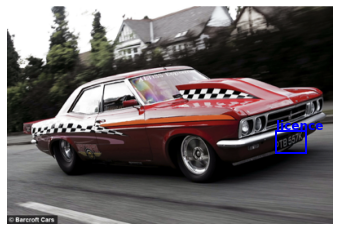

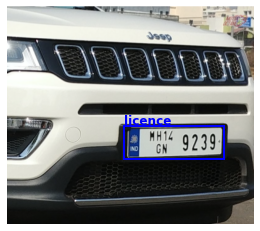

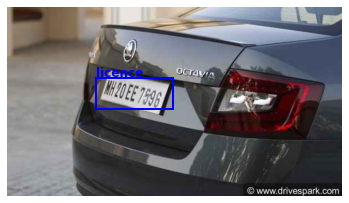

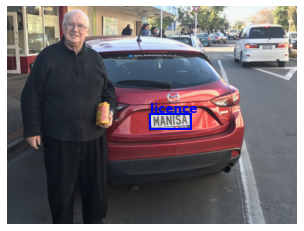

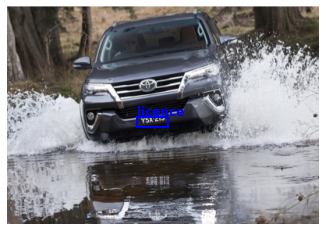

In [13]:
%pylab inline

def print_random_images(photos: list, n: int = 5, seed=None) -> None:
    if n > 10:
        n=10
    
    if seed:
        rnd.seed(seed)
        
    random_photos = rnd.sample(photos, n)
    
    for image_path in random_photos:
        
        with Image.open(image_path) as fd:
            fig, ax = plt.subplots()
            ax.imshow(fd)           
            ax.axis(False)
            
            for i, file in enumerate(df.file):
                if file in image_path:
                    x1,y1,x2,y2=list(df.iloc[i, -4:])
                        
                    mpatch=mpatches.Rectangle((x1,y1),x2-x1,y2-y1,linewidth=1, edgecolor='b',facecolor="none",lw=2,)                    
                    ax.add_patch(mpatch)
                    rx, ry = mpatch.get_xy()
                    ax.annotate('licence', (rx, ry-2), color='blue', weight='bold', fontsize=12, ha='left', va='baseline')
                    
photos_path = "/content/images/*.png"
photos_list = glob.glob(photos_path)

print_random_images(photos_list)

### YOLO model requires normalized data (in range 0 to 1) in format [class_id, x, y, width, height], where x, y are coordinates of the middle of the bounding box(with corresponding width and height). Our calculated data must be saved as a .txt file with a name corresponding to an image. Each .txt file should look like this:
[class_id, x, y, width, height]

[class_id, x, y, width, height]

[class_id, x, y, width, height]

...

In [14]:
x_pos = []
y_pos = []
frame_width = []
frame_height = []

labels_path = Path("/content/labels")

labels_path.mkdir(parents=True, exist_ok=True)

save_type = 'w'

for i, row in enumerate(df.iloc):
    current_filename = str(row.file[:-4])
    
    width, height, xmin, ymin, xmax, ymax = list(df.iloc[i][-6:])
    
    x=(xmin+xmax)/2/width
    y=(ymin+ymax)/2/height
    width=(xmax-xmin)/width
    height=(ymax-ymin)/height
    
    x_pos.append(x)
    y_pos.append(y)
    frame_width.append(width)
    frame_height.append(height)
    
    txt = '0' + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + '\n'
    
    if i > 0:
        previous_filename = str(df.file[i-1][:-4])
        save_type='a+' if current_filename == previous_filename else 'w'
    
    
    with open("/content/labels/" + str(row.file[:-4]) +'.txt', save_type) as f:
        f.write(txt)
        
        
df['x_pos']=x_pos
df['y_pos']=y_pos
df['frame_width']=frame_width
df['frame_height']=frame_height

df

file  width  height  xmin  ymin  xmax  ymax     x_pos     y_pos  \
0     Cars57.png    431     242   270   162   321   195  0.685615  0.737603   
1    Cars106.png    400     247   138    79   177    92  0.393750  0.346154   
2    Cars106.png    400     247   245    79   270    94  0.643750  0.350202   
3    Cars106.png    400     247   169   202   192   231  0.451250  0.876518   
4    Cars106.png    400     247   225   194   279   217  0.630000  0.831984   
..           ...    ...     ...   ...   ...   ...   ...       ...       ...   
466  Cars139.png    400     300   315   189   337   197  0.815000  0.643333   
467  Cars139.png    400     300   193   224   231   233  0.530000  0.761667   
468  Cars403.png    400     320   296   189   332   209  0.785000  0.621875   
469  Cars403.png    400     320    23   173    54   192  0.096250  0.570312   
470  Cars213.png    400     300   150   160   233   194  0.478750  0.590000   

     frame_width  frame_height  
0       0.118329      0.136364  
1       0.097500      0.052632  
2       0.062500      0.060729  
3       0.057500      0.117409  
4       0.135000      0.093117  
..           ...           ...  
466     0.055000      0.026667  
467     0.095000      0.030000  
468     0.090000      0.062500  
469     0.077500      0.059375  
470     0.207500      0.113333  

[471 rows x 11 columns]

## Using splitfolder library we can easily split images images and labels into training and validation sets.

In [15]:
!mkdir ./yolov5/data/Plate_recognition

In [16]:
!mkdir ./Plate_recognition
!mv ./images ./Plate_recognition
!mv ./annotations ./Plate_recognition
!mv ./labels ./Plate_recognition

In [17]:
input_folder = Path("./Plate_recognition")
output_folder = Path("./yolov5/data/Plate_recognition")
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.8, 0.2),
    group_prefix=None
)
print("Moving files finished.")

Copying files: 1299 files [00:00, 4351.02 files/s]

Moving files finished.


In [18]:
def walk_through_dir(dir_path: Path) -> None:
    """Prints dir_path content"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directiories and {len(filenames)} files in '{dirpath}' folder ")

    
walk_through_dir(input_folder)
print()
walk_through_dir(output_folder)

There are 3 directiories and 0 files in 'Plate_recognition' folder 
There are 0 directiories and 433 files in 'Plate_recognition/images' folder 
There are 0 directiories and 433 files in 'Plate_recognition/annotations' folder 
There are 0 directiories and 433 files in 'Plate_recognition/labels' folder 

There are 2 directiories and 0 files in 'yolov5/data/Plate_recognition' folder 
There are 3 directiories and 0 files in 'yolov5/data/Plate_recognition/train' folder 
There are 0 directiories and 346 files in 'yolov5/data/Plate_recognition/train/images' folder 
There are 0 directiories and 346 files in 'yolov5/data/Plate_recognition/train/annotations' folder 
There are 0 directiories and 346 files in 'yolov5/data/Plate_recognition/train/labels' folder 
There are 3 directiories and 0 files in 'yolov5/data/Plate_recognition/val' folder 
There are 0 directiories and 87 files in 'yolov5/data/Plate_recognition/val/images' folder 
There are 0 directiories and 87 files in 'yolov5/data/Plate_rec

## Yolo requires config data in .yaml file. You can explore yolov5 directory to see how should it look like. 

In [19]:
import yaml

yaml_file = './yolov5/data/plates.yaml'

yaml_data = dict(
    path = "data/Plate_recognition",
    train = "train",
    val = "val",
    nc = len(classes),
    names = classes
)

with open(yaml_file, 'w') as f:
    yaml.dump(yaml_data, f, explicit_start = True, default_flow_style = False)

## *(Optional)* Clear the gpu memory

In [20]:
def free_gpu_cache() -> None:
    print("Initial GPU Usage")
    gpu_usage()

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  4% |  1% |


In [21]:
device = '0' if torch.cuda.is_available() else 'cpu' 
device

'0'

## Train the model!
## For model installation and required downloads check this: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

In [22]:
start_time = timer()

!cd yolov5 && python train.py --workers 2 --img 640 --batch 16 --epochs 100 --data "data/plates.yaml" --weights yolov5s.pt --device {device} --cache

end_time = timer()

print(f'Training time: {(end_time-start_time):.2f}')

train: weights=yolov5s.pt, cfg=, data=data/plates.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 âœ…
YOLOv5 ðŸš€ v7.0-12-g7f5724b Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

# 2. Use evaluated model to detect plates frame by frame in a video
## Load trained weights to the model

In [26]:
!cp /content/yolov5/runs/train/exp/weights/best.pt /content/drive/MyDrive/OCR/Weights

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp/weights/best.pt', force_reload=True)

reader = easyocr.Reader(['en'])

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 ðŸš€ 2022-12-1 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Progress: |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 100.0% Complete

Progress: |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 100.0% Complete

In [25]:
def get_plates_xy(frame: np.ndarray, labels: list, row: list, width: int, height: int, reader: easyocr.Reader) -> tuple:
    '''Get the results from easyOCR for each frame and return them with bounding box coordinates'''
    
    x1, y1, x2, y2 = int(row[0]*width), int(row[1]*height), int(row[2]*width), int(row[3]*height) ## BBOx coordniates
    plate_crop = frame[int(y1):int(y2), int(x1):int(x2)]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) ## BBox
    ocr_result = reader.readtext(np.asarray(plate_crop), allowlist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')#, paragraph="True", min_size=50)
    
    return ocr_result, x1, y1


def detect_text(i: int, row: list, x1: int, y1: int, ocr_result: list, detections: list, yolo_detection_prob: float=0.3) -> list:
    '''Checks the detection's probability, discards those with low prob and rewrites output from ocr_reader to >>detections<< list'''
    
    if row[4] >= yolo_detection_prob: #discard predictions below the value             
        if(len(ocr_result))>0:
            for item in ocr_result:     
                    detections[i][0]=item[1]
                    detections[i][1]=[x1, y1]
                    detections[i][2]=item[2]
                    
    return detections


def is_adjacent(coord1: list, coord2: list) -> bool:
    '''Checks if [x, y] from list coord1 is similar to coord2'''
    
    MAX_PIXELS_DIFF=50
    
    if (abs(coord1[0] - coord2[0]) <= MAX_PIXELS_DIFF) and (abs(coord1[1] - coord2[1]) <= MAX_PIXELS_DIFF):
        return True
    else:
        return False
    

def sort_detections(detections: list, plates_data: list) -> list:
    '''Looks at detections from last frame and rewrites indexes for similar coordinates'''
    
    for m in range(0, len(detections)):
        for n in range(0, len(plates_data)):
            if not detections[m][1]==[0, 0] and not plates_data[n][1]==[0,0]:
                if is_adjacent(detections[m][1], plates_data[n][1]):
                    if m!=n:
                        temp=detections[m]
                        detections[m]=detections[n]
                        detections[n]=temp
                        
    return detections


def delete_old_labels(detections: list, count_empty_labels: list, plates_data: list, frames_to_reset: int=3) -> tuple:
    '''If earlier detected plate isn't spotted for the next >>FRAMES_TO_RESET<< frames, delete it from >>plates_data<<'''
    
    for m in range(0, len(detections)):
        if detections[m][0]=='None' and not count_empty_labels[m]==frames_to_reset:
            count_empty_labels[m]+=1
        elif count_empty_labels[m]==frames_to_reset:
            count_empty_labels[m]=0
            plates_data[m]=['None', [0,0], 0]
        else:
            count_empty_labels[m]=0
            
    return plates_data, count_empty_labels


def overwrite_plates_data(detections: list, plates_data: list, plate_lenght=None) -> list:
    '''Checks coordinates from >>detections<<, if there is similar record in >>plate_data<< tries to overwrite it (only if probability is higher)'''
    
    if (detections[i][2]>plates_data[i][2] or detections[i][2]==0):
        if plate_lenght:
            if len(detections[i][0])==plate_lenght:
                plates_data[i][0]=detections[i][0]
                plates_data[i][2]=detections[i][2]       
        else:
            plates_data[i][0]=detections[i][0]
            plates_data[i][2]=detections[i][2]
    plates_data[i][1]=detections[i][1]
        
    return plates_data

## Points 3, 4, 5 are executed for each frame of the video. The functions used here are described one cell above.

In [ ]:
video_path = "/content/Plate_recognition/Sample_video.mp4"
cap = cv2.VideoCapture(video_path)

plates_data = [['None', [0,0], 0] for n in range(5)]
count_empty_labels=[0]*5

assert cap.isOpened()

while(cap.isOpened()):
    ret, frame = cap.read()
    assert not isinstance(frame,type(None)), 'frame not found'
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)    
    results = model(frame)   
    frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
    
    labels, coordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
    width, height = frame.shape[1], frame.shape[0]
    
    detections=[['None', [0,0], 0] for n in range(5)]
    i=0 
    
    
    ## Read all detected plates per each frame and save them to >>detections<<
    while i < len(labels):    
        row = coordinates[i]
        ## 3. Crop detections and pass them to the easyOCR
        ocr_result, x1, y1=get_plates_xy(frame, labels, row, width, height, reader)  
        
        ## 4. Get reading for the each frame
        detections=detect_text(i, row, x1, y1, ocr_result, detections, 0.5)
        i+=1    
    i=0
    
    ## 5. Do some tracking and data managing for better results
    ## If we get multiple detections in one frame easyOCR mixes them every few frames, so here we make sure that they are saved according to the \
    ## detections' coordinates. Then we delete data about plates that dissapeared for more than >>frames_to_reset<< frames. And finally we overwrite \
    ## the predictions (regarding to the probability of easyOCR detections - if new predcition has less p% than the previous one, we skip it.)
    
    ## Sort detections 
    detections=sort_detections(detections, plates_data)
    
    ## Delete data about plates that dissapeared from frame
    plates_data, count_empty_labels=delete_old_labels(detections, count_empty_labels, plates_data, 3)
            
    ## Overwrite data and print text predictions over the boxes
    while i < len(labels):
        plates_data=overwrite_plates_data(detections, plates_data, 7)
        cv2.putText(frame, f"{plates_data[i][0]}", (plates_data[i][1]), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
        i+=1
    
    cv2.imshow('YOLO & OCR', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## We can also use our model to read plates from the photos

Photo width,height: 2048,1536. Detected plates: 1

Detection: 1. YOLOv5 prob: 0.90, easyOCR results: [[[[25, -4], [329, -4], [329, 126], [25, 126]], 'CB 38947']]


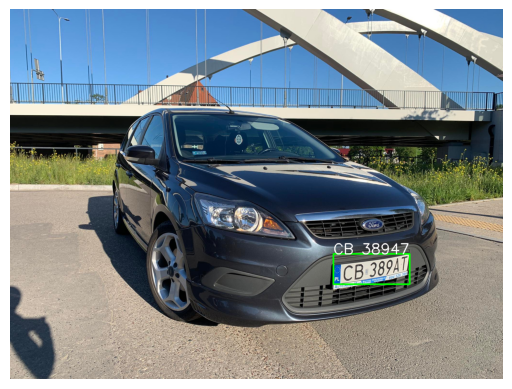

In [ ]:
%matplotlib inline

test_photo_path = "/content/Plate_recognition/Sample_photo2.jpg"

results = model(test_photo_path)
detections=np.squeeze(results.render())

labels, coordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]
image = cv2.imread(test_photo_path)
width, height = image.shape[1], image.shape[0]

print(f'Photo width,height: {width},{height}. Detected plates: {len(labels)}')

for i in range(len(labels)):
    row = coordinates[i]
    if row[4] >= 0.6:
        x1, y1, x2, y2 = int(row[0]*width), int(row[1]*height), int(row[2]*width), int(row[3]*height)
        plate_crop = image[int(y1):int(y2), int(x1):int(x2)]
        ocr_result = reader.readtext((plate_crop), paragraph="True", min_size=120, allowlist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ')
        text=ocr_result[0][1]
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 6) ## BBox
        cv2.putText(image, f"{text}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 3)
        plt.axis(False)
        plt.imshow((image)[...,::-1])
        
        print(f'Detection: {i+1}. YOLOv5 prob: {row[4]:.2f}, easyOCR results: {ocr_result}')